In [ ]:
# GBA 462 Lab 2

Liuyi Ye / Xinyi Wang

09/19/2023


In [ ]:
### import packages
import pandas as pd ### pandas for reading excel xlsx file
import numpy as np ### numpy for matrix algebra and stats functions
from scipy.stats import norm
from scipy.stats import uniform
### read file
### We first read excel file into python,
### then assign this data frame (table) to an object called "df"
df = pd.read_excel("WaitTimes.xlsx")

In [ ]:
df.head()

,Trip,WaitTime
0,1,18.1
1,2,15.3
2,3,18.3
3,4,18.6
4,5,22.3


In [ ]:
len(df)

1000

<Axes: ylabel='Frequency'>

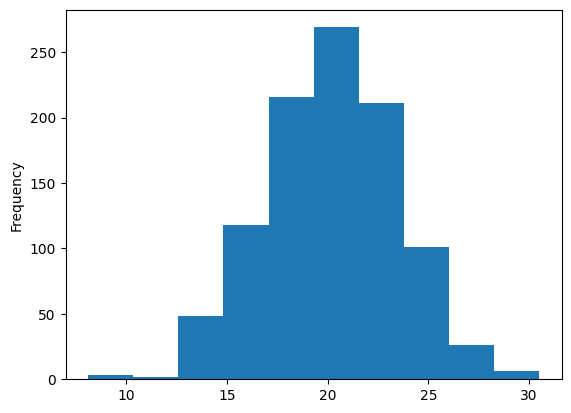

In [ ]:
df.WaitTime.plot.hist(bins=10)

**Long question: similar to HW2 **

You work for a ride-sharing company (like Uber) which has recently considered providing a guarantee for
passengers on their waiting times (e.g., “Guaranteed pickup within 25 minutes, or your ride is on us!”).
Nonetheless, you are worried about how many free rides the company will give away once the company
commits itself to such a policy. At a conference, the senior managers claims that passengers’ waiting times are
uniformly distributed between 10 minutes and 30 minutes, but you are skeptical about this. Fortunately, you
have compiled a dataset with 1000 observations of passengers’ actual waiting times UBER_WaitTimes.xlsx,
during your time working here.



a. Use the dataset you assembled to compute the sample average, the sample standard deviation,
and the sample variance of passengers’ waiting time.

In [ ]:
# sample mean
print(np.mean(df["WaitTime"]))
print(df['WaitTime'].mean())

20.166
20.166


In [ ]:
# calculate sample standard deviation and variance
print(df["WaitTime"].std())
print(df["WaitTime"].var())

3.2405470441185
10.501145145145145


b. Do your findings in part a support the senior managers’ claim (i.e., do you think your findings in part a
are consistent with delivery times being distributed uniformly between 10 and 30 minutes?) Why?

In [ ]:
(30-10)**2/12

33.333333333333336

c. Suppose that, after looking into this dataset, you assume the passengers’ waiting times are normally
distributed with the mean and standard deviation you computed in part a. Using your estimates from
part a, find an interval (i.e., provide lower and upper cut-off times) such that you would expect 95% of
the waiting times to fall into this interval. Reconstruct this interval, but replace 95% with 90%. What
would these intervals be if you assumed that the passengers’ waiting times are uniformly distributed
between 10 minutes and 30 minutes? compare your answers under the two distribution assumptions

In [ ]:
# lower cutoff: 95%
# q is where inverse cdf is calculated, loc is mean, scale is standard deviation
norm.ppf(q = 0.025, loc = 20.17, scale = 3.24)

13.819716690090225

In [ ]:
# upper cutoff: 95%
norm.ppf(q = 0.975, loc = 20.17, scale = 3.24)

26.52028330990978

In [ ]:
# interval for 90%

print(norm.ppf(q = 0.05, loc = 20.17, scale = 3.24))
print(norm.ppf(q = 0.95, loc = 20.17, scale = 3.24))

14.840674248677228
25.499325751322772


In [ ]:
# Uniform  X ~ U(10,30): first

# uniform.ppf:  lower bound: loc
#               upper bound: scale + loc
print(uniform.ppf(q = 0.025, loc = 10, scale = 20))
print(uniform.ppf(q = 0.975, loc = 10, scale = 20))

10.5
29.5


In [ ]:
# Uniform  X ~ U(10,30): second

# expect 1 - 95% = 5% of the waiting time to fall out of this interval
# in other words, the outer bins would be the bottom 2.5% and top 2.5%

print(10 + (30-10)* 0.025)
print(30 - (30-10)* 0.025)

10.5
29.5


d. Under your assumption of a normal distribution, what is the probability that a driver arrives in 25
minutes or more? What about 22 minutes or less? 24 minutes or less? What would your answers be if
you assumed a uniform distribution?

In [ ]:
# x is where cdf is calculated, loc is mean, scale is standard deviation
1 - norm.cdf(x = 25, loc = 20.17, scale = 3.24)


0.06801478767528313

In [ ]:
norm.cdf(x = 22, loc = 20.17, scale = 3.24)

0.7139001353664538

In [ ]:
norm.cdf(x = 24, loc = 20.17, scale = 3.24)

0.881416742892271

In [ ]:
# uniform
# uniform.cdf:  lower bound: loc
#               upper bound: scale + loc
1- uniform.cdf(x=25, loc=10, scale = 20)

0.25

In [ ]:
uniform.cdf(22, loc=10, scale = 20)

0.6

In [ ]:
uniform.cdf(24, loc=10, scale = 20)

0.7

e. If the company were to carry out the policy mentioned above (i.e., only charging for the rides when the
drivers arrive within 25 minutes), would it be important to find out which distribution was the correct
one? Why or why not? Explain in an intuitive way.

In [ ]:
# free rides

# under normal dist
1-norm.cdf(x = 25, loc = 20.17, scale = 3.24)

0.06801478767528313

In [ ]:
# under uniform dist
1-uniform.cdf(x = 25, loc = 10, scale = 20)

0.25

f. Construct a 95% confidence interval for the population mean. How does this compare to the 95%
interval you constructed in part c (for the Normal case)? If they are different, why?

A point estimate is not enough, because it doesn’t provide us how close the estimate is to the true parameter: We want an interval that measures the confidence we have that the interval does indeed contain the parameter.

CLT: for large enough samples, $\bar{X}$ from a random sample for any population will be approximately normal, i.e approximately, $X \sim N(\mu_X,  \frac{\sigma^2_X}{n})$ or  $\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt{n}} \sim N(0,1)$

Note: $P(-1.96 \leq \frac{\bar{X} - \mu_X}{\sigma_X / \sqrt{n}}  \leq 1.96) = 0.95$ ->  $[\bar{X} - 1.96 \times \frac{\sigma_X }{\sqrt{n}} \leq \mu_X \leq \bar{X} + 1.96 \times \frac{\sigma_X }{\sqrt{n}}  ]$



In [ ]:
#std_err = sd/sqrt(n)

print(  df['WaitTime'].mean() - 1.96 * df['WaitTime'].std()/np.sqrt(len(df)) )
print(  df['WaitTime'].mean() + 1.96 * df['WaitTime'].std()/np.sqrt(len(df)) )


19.965148813322923
20.366851186677078


In [ ]:
# notice this is much smaller than the interval in (c)

# Confidence interval is to describe how confident we are about our estimate (sample mean)
# We have 1000 observations


# Predictive interval is to describe the population as a whole


g. Would the confidence interval you constructed in part f. change if the population distribution was uniform instead of normal? Why or why not?

h. Is there enough evidence to believe that the average waiting time is significantly different from 25 mins?
State the null and the alternate hypothesis (two-sided test). Conduct the hypothesis testing. Would
your conclusion change if you use a 10% significance level instead of a 5% level?

**Hypothesis testing** uses a sample of data to test a hypothesis about a population parameter such a $\mu$

1. step 1 (state the hypothesis)

null: $\mu = \mu_0$
alternative $\mu \neq \mu_0$  (in this question, $\mu_0 = 25$

2. step 2 (obtain the T stat): $t = \frac{\bar{X}-\mu_0}{s_X / \sqrt{n}}$. Here, the null is assumed true until the data strongly suggest otherwise

3. step 3 (make the conclusion): reject?

Reject the null if the null hypothesis (1) at 10% level if T lies outside of the interval $[-1.65, 1.65] $  (2) at 5% level if T lies outside of $[-1.96, 1.96]$  (3) 1% if T lies outside of $[-2.58, 2.58]$.

Alternatively we calculate the p value and compare it with significance level, if p < the significance level, reject the null

*Note 1*: a confidence interval at the level of significance $\alpha$
means a $1-\alpha$
confidence interval

*Note 2*:  P-value is the probablity of seeing data this "weird" if the null were in fact true. A very small p-value means that such an extreme outcome would be very unlikely under the null hypothesis. The higher the t-stat, the lower the p-value

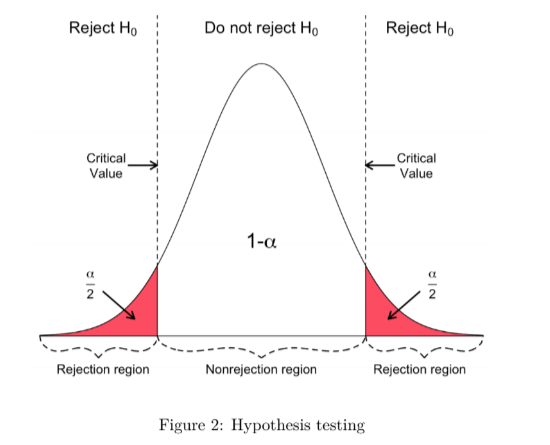

In [ ]:
# Null: mu_0 = 25
# Alternative: mu_0 != 25

# obtain the T stat

T =  (df['WaitTime'].mean() - 25 )    /  (df['WaitTime'].std() / np.sqrt(len(df)))

T

-47.172437249440385

In [ ]:
# p-value

from scipy import stats
from scipy.stats import t

P = 2 * (1 - t.cdf(-T, len(df)-1))
P

0.0

In [ ]:
stats.t.sf(np.abs(-T), len(df)-1)*2

2.0227953709443815e-256